In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from prg import create_prg_curve
from prg import calc_auprg
from prg import plot_prg
from prg import plot_pr

plt.rcParams['figure.figsize'] = (6,5)

## Toy example

This is a minimal example that ilustrates the possible outcomes o ilustrate one possible outcome for the Precision-Recall-Gain curve.

In [2]:
labels = np.array([1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,0,1,0,0,0,1,0,1], dtype='int')
scores = np.arange(1,26)[::-1]/25.0

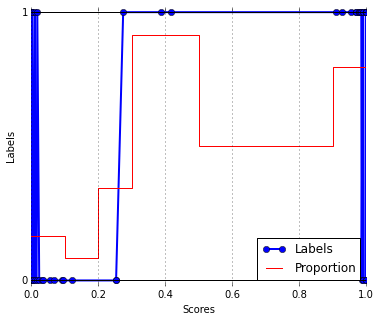

In [12]:
def plot_scores_vs_labels(scores, labels):
    plt.axes(frameon=False)
    index_array = np.argsort(scores)
    plt.plot(scores[index_array], labels[index_array], 'bo-', linewidth=2, label='Labels')
    plt.axhline(y=0, xmin=0, xmax=1, color='k')
    plt.axhline(y=1, xmin=0, xmax=1, color='k')
    plt.ylim([-0.02, 1.02])
    plt.xlabel('Scores')
    plt.ylabel('Labels')
    plt.yticks([0,1])
    plt.grid(True)
    
    alpha = 0.1
    bins = np.linspace(0,1,11)
    hist_tot = np.histogram(scores, bins=bins)
    hist_pos = np.histogram(scores[labels==1], bins=bins)
    proportion = np.true_divide(hist_pos[0]+alpha, hist_tot[0]+2*alpha)
    proportion = np.insert(proportion, np.arange(len(proportion)), proportion)
    edges = np.insert(bins, np.arange(len(bins)), bins)
    plt.plot(edges[1:-1], proportion, 'r', label='Proportion')
    plt.legend(loc='lower right')

plot_scores_vs_labels(scores, labels)

In [13]:
prg_curve = create_prg_curve(labels,scores)
auprg = calc_auprg(prg_curve)

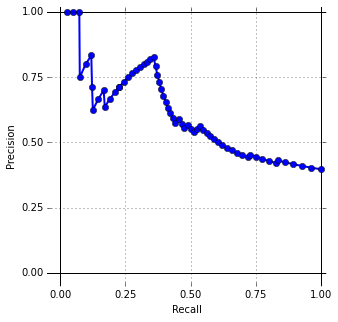

In [14]:
fig = plot_pr(prg_curve)

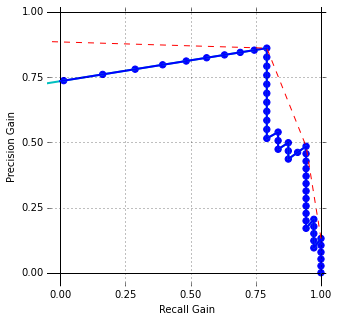

In [15]:
fig = plot_prg(prg_curve, show_convex_hull=True)

## Real example

### Effect of Two Long-term Mowing Regimes on Vegetation

Example with the scores obtained from http://www.openml.org/r/145651

    US Fish and Wildlife Service, Department of the Interior — In 1997, all mowing at Patuxent was halted as a way to reduce maintenance costs. The lack of mowing and the subsequent growth of plants, with diagnostic fruiting...

In [16]:
labels = np.asarray([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
                     0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                     0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1])

scores = np.asarray([1.96000000e-04,   8.60000000e-05,   1.50000000e-05,   0.00000000e+00,   9.99985000e-01,   
                     3.42500000e-03,   7.00000000e-05,   3.00000000e-06,   2.00000000e-06,   9.86977000e-01,   
                     1.87000000e-04,   9.85893000e-01,   9.79370000e-01,   4.16910000e-01,   9.92181000e-01,
                     3.00000000e-05,   6.60000000e-03,   9.35410000e-02,   1.82110000e-02,   9.99963000e-01,   
                     1.80500000e-03,   1.12090000e-02,   6.69310000e-02,   2.53514000e-01,   3.16340000e-02,
                     2.74719000e-01,   9.89815000e-01,   9.98999000e-01,   6.50000000e-05,   1.60450000e-02,
                     1.11200000e-03,   9.99598000e-01,   9.55841000e-01,   5.61220000e-02,   1.30200000e-03,   
                     5.62000000e-04,   1.22666000e-01,   9.10411000e-01,   9.91160000e-01,   5.00000000e-06,   
                     4.10900000e-03,   3.39680000e-02,   1.77000000e-04,   1.30000000e-05,   9.78281000e-01,
                     3.49000000e-04,   4.88000000e-04,   4.27000000e-04,   9.16590000e-02,   9.69516000e-01,   
                     1.09510000e-02,   9.99844000e-01,   2.39460000e-02,   2.52191000e-01,   9.28511000e-01,   
                     9.70022000e-01,   1.00000000e+00,   6.90000000e-05,   8.00000000e-06,   9.27000000e-04,
                     3.86550000e-01,   9.81855000e-01,   9.99814000e-01])

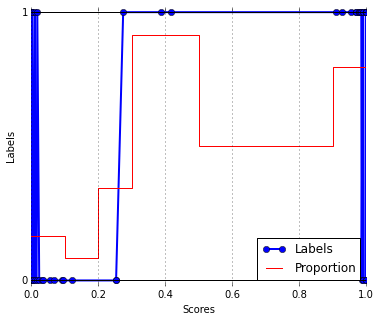

In [17]:
plot_scores_vs_labels(scores, labels)

In [18]:
prg_curve = create_prg_curve(labels,scores)
auprg = calc_auprg(prg_curve)

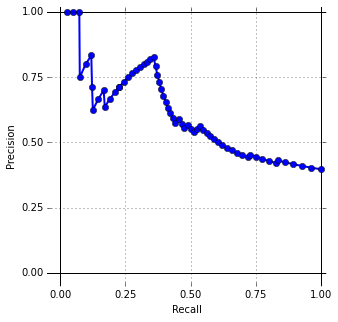

In [19]:
fig = plot_pr(prg_curve)

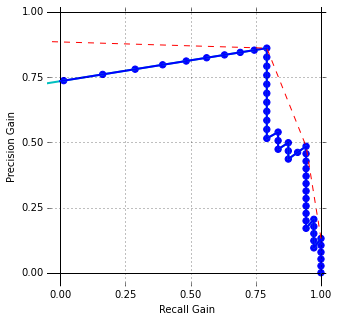

In [20]:
fig = plot_prg(prg_curve, show_convex_hull=True)